In [12]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas import json_normalize

import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d, griddata
from itertools import product
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Plot $\sigma(p p \to \chi \chi)/\sigma(p p \to Z^{\prime}) \times BR(Z^{\prime} \to \chi \chi)$ from slha files


In [14]:
pcl2MDM = ['../slha_files_axial_onshell_scan/slhaCombined.pcl']
pclDMsimp = ['../dmsimp_slhaCombined.pcl']
dfs = [pd.read_pickle(i) for i in pcl2MDM]
dataDF_2mdm = pd.concat(dfs, ignore_index=True)
dfs = [pd.read_pickle(i) for i in pclDMsimp]
dataDF_dmsimp = pd.concat(dfs, ignore_index=True)

In [15]:
# dataDF_2mdm.sort_values(['mass.9000006', 'mass.9900032'], inplace=True)
dataDF_dmsimp.sort_values(['mass.52', 'mass.55'], inplace=True)
dataDF_2mdm.sort_values(['mass.52', 'mass.55'], inplace=True)

In [16]:
dataDF_dmsimp = dataDF_dmsimp[(dataDF_dmsimp['extpar.3']==1.0)&(dataDF_dmsimp['extpar.10']==0.25)]

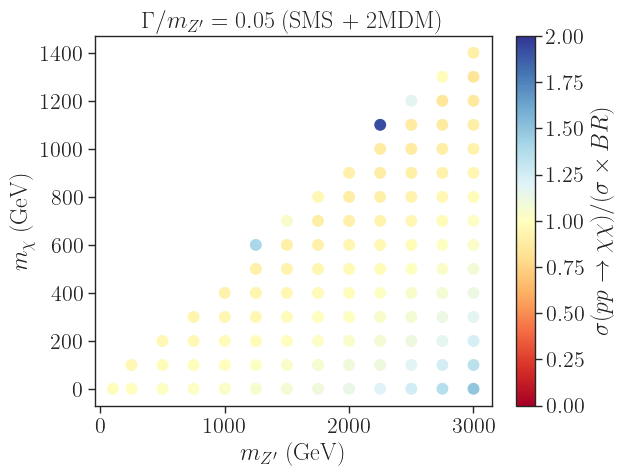

In [10]:
fig = plt.plot(figsize=(10,15))

xsectot = np.array(dataDF_dmsimp['xsec13TeV(fb).52_52'])
xsec = np.array(dataDF_2mdm['xsec13TeV(fb).9900032'])
BR = np.array(dataDF_2mdm['BRs.zp.chi,chi'])
xsecBR = xsec*BR
w = dataDF_2mdm['width.9900032']


x = dataDF_2mdm['mass.9900032']
y = dataDF_2mdm['mass.9000006']
z = xsectot/(xsec*BR)

sc = plt.scatter(x=x, y=y, c=z, s=60, cmap=cm, vmin=0., vmax=2.)
plt.colorbar(sc, label=r'$\sigma(p p \to \chi \chi)/(\sigma \times BR)$')

plt.ylabel(r'$m_{\chi}$ (GeV)')
plt.title(r'$\Gamma/m_{Z^{\prime}} = 0.05$ (SMS + 2MDM)')
    
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)')
plt.savefig('../../figures/ratio-xsec-4.png')
plt.show()

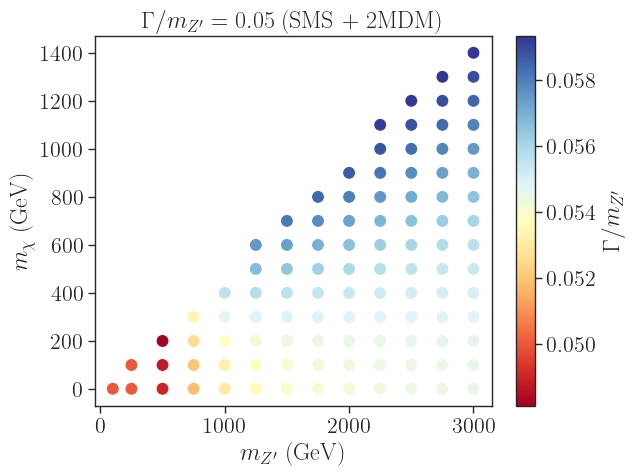

In [11]:
fig = plt.plot(figsize=(10,15))

xsectot = np.array(dataDF_dmsimp['xsec13TeV(fb).52_52'])
xsec = np.array(dataDF_2mdm['xsec13TeV(fb).9900032'])
BR = np.array(dataDF_2mdm['BRs.zp.chi,chi'])
xsecBR = xsec*BR
w = dataDF_2mdm['width.9900032']


x = dataDF_2mdm['mass.9900032']
y = dataDF_2mdm['mass.9000006']
z = w/x

sc = plt.scatter(x=x, y=y, c=z, s=60, cmap=cm)
plt.colorbar(sc, label=r'$\Gamma/m_{Z^{\prime}}$')

plt.ylabel(r'$m_{\chi}$ (GeV)')
plt.title(r'$\Gamma/m_{Z^{\prime}} = 0.05$ (SMS + 2MDM)')
    
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)')
plt.savefig('../../figures/ratio-xsec-4.png')
plt.show()

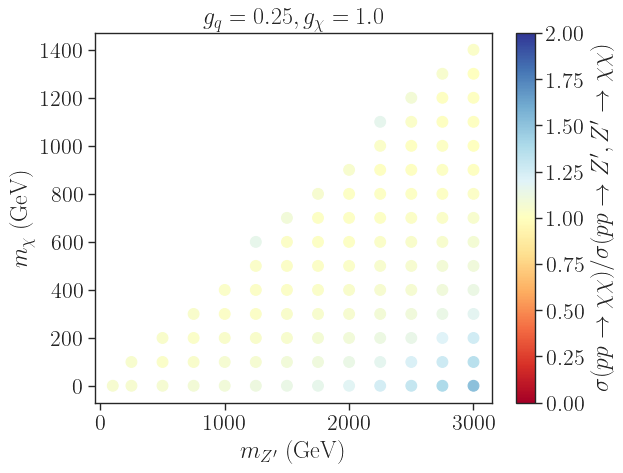

In [21]:
fig = plt.plot(figsize=(10,15))

xsectot = np.array(dataDF_dmsimp['xsec13TeV(fb).52_52'])
xsec = np.array(dataDF_2mdm['xsec13TeV(fb).55'])
BR = np.array(dataDF_2mdm['BRs.y1.xd~,xd'])
xsecBR = xsec*BR
# w = dataDF_2mdm['width.9900032']


x = dataDF_2mdm['mass.55']
y = dataDF_2mdm['mass.52']
z = xsectot/(xsec)

sc = plt.scatter(x=x, y=y, c=z, s=60, cmap=cm, vmin=0., vmax=2.)
plt.colorbar(sc, label=r'$\sigma (p p \to \chi \chi)/\sigma(p p \to Z^{\prime}, Z^{\prime} \to \chi \chi)$')

plt.ylabel(r'$m_{\chi}$ (GeV)')
plt.title(r'$g_{q} = 0.25, g_{\chi} = 1.0$')
    
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)')
plt.savefig('../../figures/ratio-xsec-5.png')
plt.show()

In [24]:
dataDF_2mdm['xsec13TeV(fb).55'][(dataDF_2mdm['mass.55']==3000)]/dataDF_2mdm['BRs.y1.xd~,xd'][(dataDF_2mdm['mass.55']==3000)]

15    54.029894
61    53.893494
20    53.773691
87    53.693823
14    53.364250
81    52.735928
59    52.249607
92    51.881558
84    51.619160
2     51.238846
86    50.616831
22    49.263627
36    49.049702
16    48.203295
7     49.040004
dtype: float64

KeyError: 'xsec13TeV(fb).52_52'

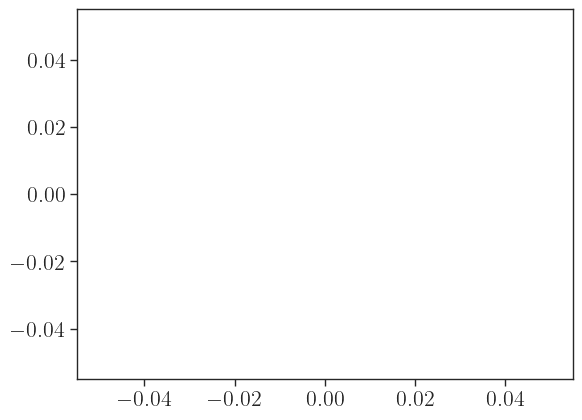

In [23]:
fig = plt.plot(figsize=(10,15))

xsectot = np.array(dataDF_dmsimp['xsec13TeV(fb).52_52'])
xsec = np.array(dataDF_2mdm['xsec13TeV(fb).55'])
BR = np.array(dataDF_2mdm['BRs.y1.xd~,xd'])
# xsecBR = xsec
w = dataDF_2mdm['width.55']


x = dataDF_2mdm['mass.55']
y = dataDF_2mdm['mass.52']
z = w/x

sc = plt.scatter(x=x, y=y, c=z, s=60, cmap=cm)
plt.colorbar(sc, label=r'$\sigma_{tot}/(\sigma \times BR)$')

plt.ylabel(r'$m_{\chi}$ (GeV)')
plt.title(r'$\Gamma/m_{Z^{\prime}} = 0.05$')
    
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)')
# plt.savefig('../../figures/ratio-xsec-diff-widths.png')
plt.show()

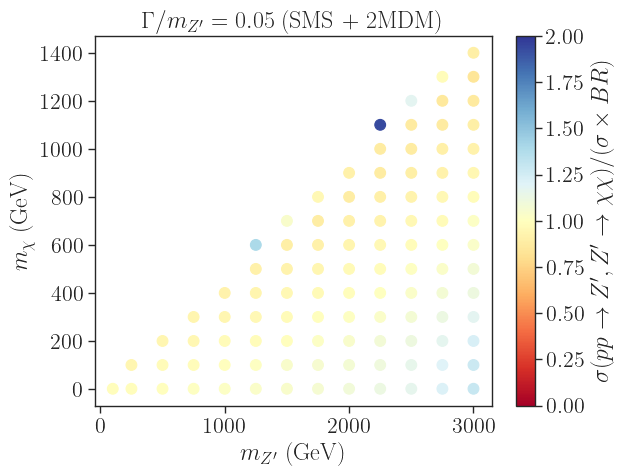

In [24]:
fig = plt.plot(figsize=(10,15))

xsectot = np.array(dataDF_dmsimp['xsec13TeV(fb).55'])
xsec = np.array(dataDF_2mdm['xsec13TeV(fb).9900032'])
BR = np.array(dataDF_2mdm['BRs.zp.chi,chi'])
xsecBR = xsec*BR
w = dataDF_2mdm['width.9900032']


x = dataDF_2mdm['mass.9900032']
y = dataDF_2mdm['mass.9000006']
z = xsectot/(xsec*BR)

sc = plt.scatter(x=x, y=y, c=z, s=60, cmap=cm, vmin=0., vmax=2.)
plt.colorbar(sc, label=r'$\sigma(p p \to Z^{\prime}, Z^{\prime} \to \chi \chi)/(\sigma \times BR)$')

plt.ylabel(r'$m_{\chi}$ (GeV)')
plt.title(r'$\Gamma/m_{Z^{\prime}} = 0.05$ (SMS + 2MDM)')
    
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)')
plt.savefig('../../figures/ratio-xsec-4.png')
plt.show()

KeyError: 'xsec13TeV(fb).52_52'

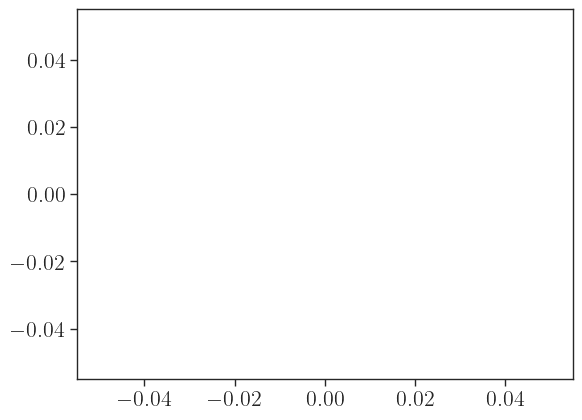

In [17]:
fig = plt.plot(figsize=(10,15))

xsectot = np.array(dataDF_dmsimp['xsec13TeV(fb).52_52'])
xsec = np.array(dataDF_2mdm['xsec13TeV(fb).9900032'])
BR = np.array(dataDF_2mdm['BRs.zp.chi,chi'])
xsecBR = xsec*BR
w = dataDF_2mdm['width.9900032']


x = dataDF_2mdm['mass.9900032']
y = dataDF_2mdm['mass.9000006']
z = w/x

sc = plt.scatter(x=x, y=y, c=z, s=60, cmap=cm)
plt.colorbar(sc, label=r'$\sigma_{tot}/(\sigma \times BR)$')

plt.ylabel(r'$m_{\chi}$ (GeV)')
plt.title(r'$\Gamma/m_{Z^{\prime}} = 0.05$')
    
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)')
# plt.savefig('../../figures/ratio-xsec-diff-widths.png')
plt.show()

In [16]:
0.03815/(0.054168*4.714059e-01)

1.4940210886832352

In [8]:
7.614113e-01/100

0.0076141130000000005

### Plot $\Delta m_{Z^{\prime}}$ vs $m_{Z^{\prime}}$

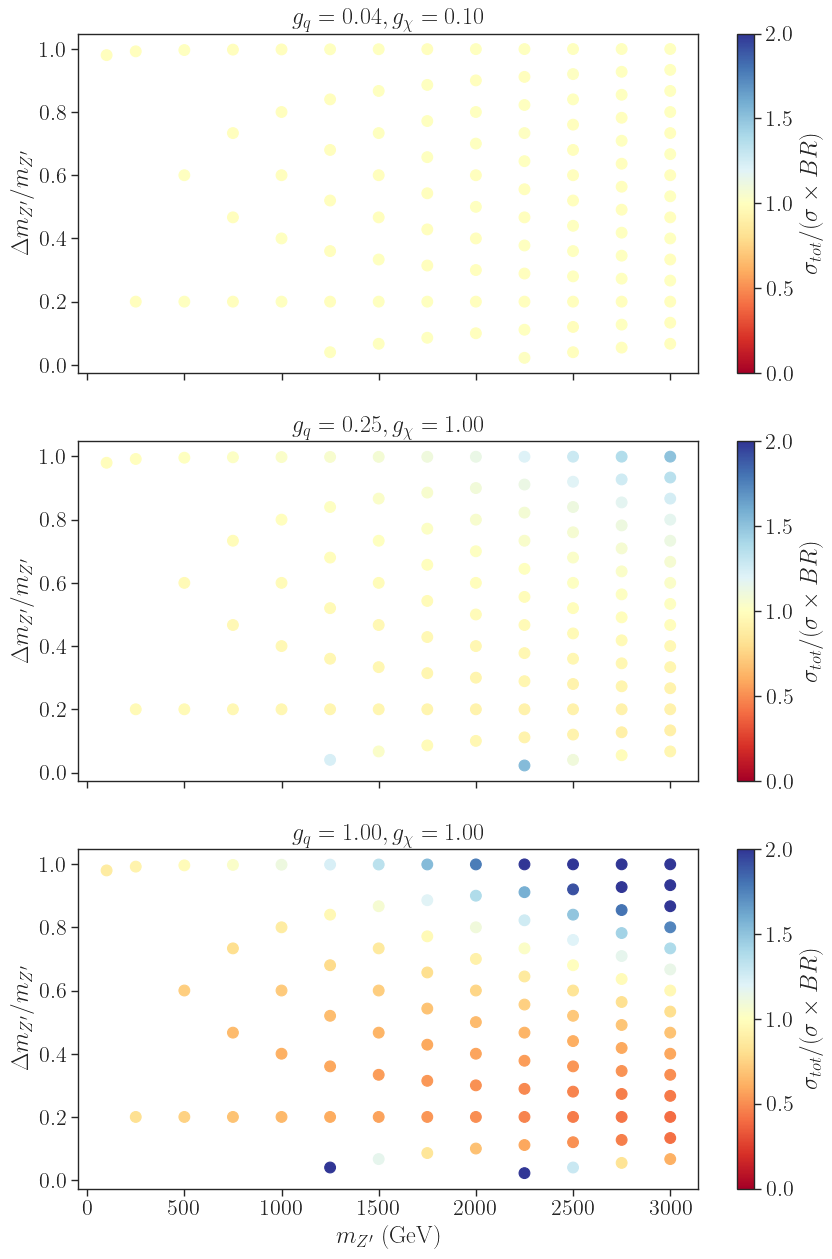

In [34]:
fig, ax = plt.subplots(3,sharex=True,figsize=(10,15))

for i, gs in enumerate(couplingPair):
    data_dmsimp = dataDF_dmsimp[(dataDF_dmsimp['extpar.3']==gs[0])&(dataDF_dmsimp['extpar.10']==gs[1])]
    data_2mdm = dataDF_2mdm[(dataDF_2mdm['extpar.1']==gs[0]*1.414214)&(dataDF_2mdm['extpar.3']==gs[1])]
    
    xsectot = np.array(data_dmsimp['xsec13TeV(fb).52_52'])
    xsec = np.array(data_2mdm['xsec13TeV(fb).9900032'])
    BR = np.array(data_2mdm['BRs.zp.chi,chi'])
    xsecBR = xsec*BR
    w = data_2mdm['width.9900032']
    deltaMz = np.abs(2*data_2mdm['mass.9000006'] - data_2mdm['mass.9900032'])
    
    
    x = data_2mdm['mass.9900032']
    y = deltaMz/x
    z = xsectot/(xsec*BR)
    
    sc = ax[i].scatter(x=x, y=y, c=z, s=60, cmap=cm, vmin=0, vmax=2)
    fig.colorbar(sc,ax=ax[i], label=r'$\sigma_{tot}/(\sigma \times BR)$')
    
    ax[i].set_ylabel(r'$\Delta m_{Z^{\prime}}/m_{Z^{\prime}}$')
    ax[i].set_title(r'$g_{q} = %1.2f, g_{\chi} = %1.2f$' %(gs[1], gs[0]))
    
ax[2].set_xlabel(r'$m_{Z^{\prime}}$ (GeV)')
# plt.savefig('../../figures/ratio-xsec-diff-widths.png')
plt.show()

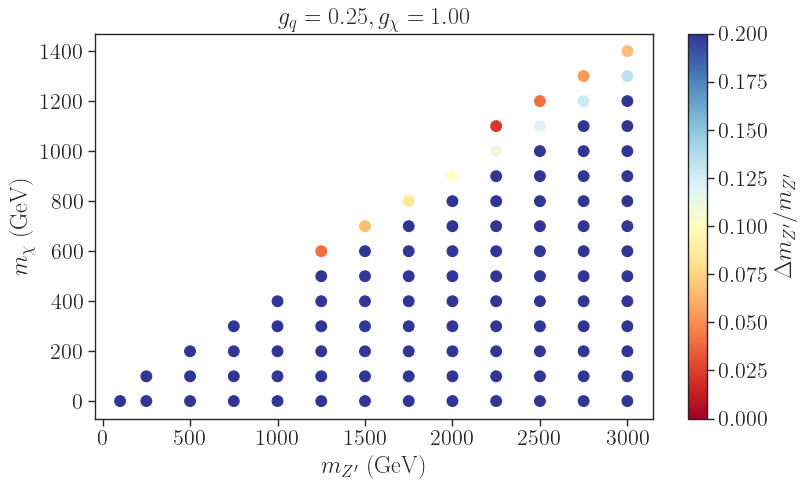

In [59]:
fig, ax = plt.subplots(1,figsize=(9,5))

gq = 0.25
gchi = 1.0
data_dmsimp = dataDF_dmsimp[(dataDF_dmsimp['extpar.3']==gchi)&(dataDF_dmsimp['extpar.10']==gq)]
data_2mdm = dataDF_2mdm[(dataDF_2mdm['extpar.1']==gchi*1.414214)&(dataDF_2mdm['extpar.3']==gq)]

xsectot = np.array(data_dmsimp['xsec13TeV(fb).52_52'])
xsec = np.array(data_2mdm['xsec13TeV(fb).9900032'])
BR = np.array(data_2mdm['BRs.zp.chi,chi'])
xsecBR = xsec*BR
w = data_2mdm['width.9900032']
deltaMz = np.abs(2*data_2mdm['mass.9000006'] - data_2mdm['mass.9900032'])


x = data_2mdm['mass.9900032']
y = data_2mdm['mass.9000006']
z = deltaMz/x

sc = ax.scatter(x=x, y=y, c=z, s=60, cmap=cm, vmin=0.0, vmax=0.2)
fig.colorbar(sc,ax=ax, label=r'$\Delta m_{Z^{\prime}}/m_{Z^{\prime}}$')

ax.set_ylabel(r'$m_{\chi}$ (GeV)')
ax.set_title(r'$g_{q} = %1.2f, g_{\chi} = %1.2f$' %(gq, gchi))
    
ax.set_xlabel(r'$m_{Z^{\prime}}$ (GeV)')
# plt.savefig('../../figures/ratio-xsec-diff-widths.png')
plt.show()

### Plot branching ratios

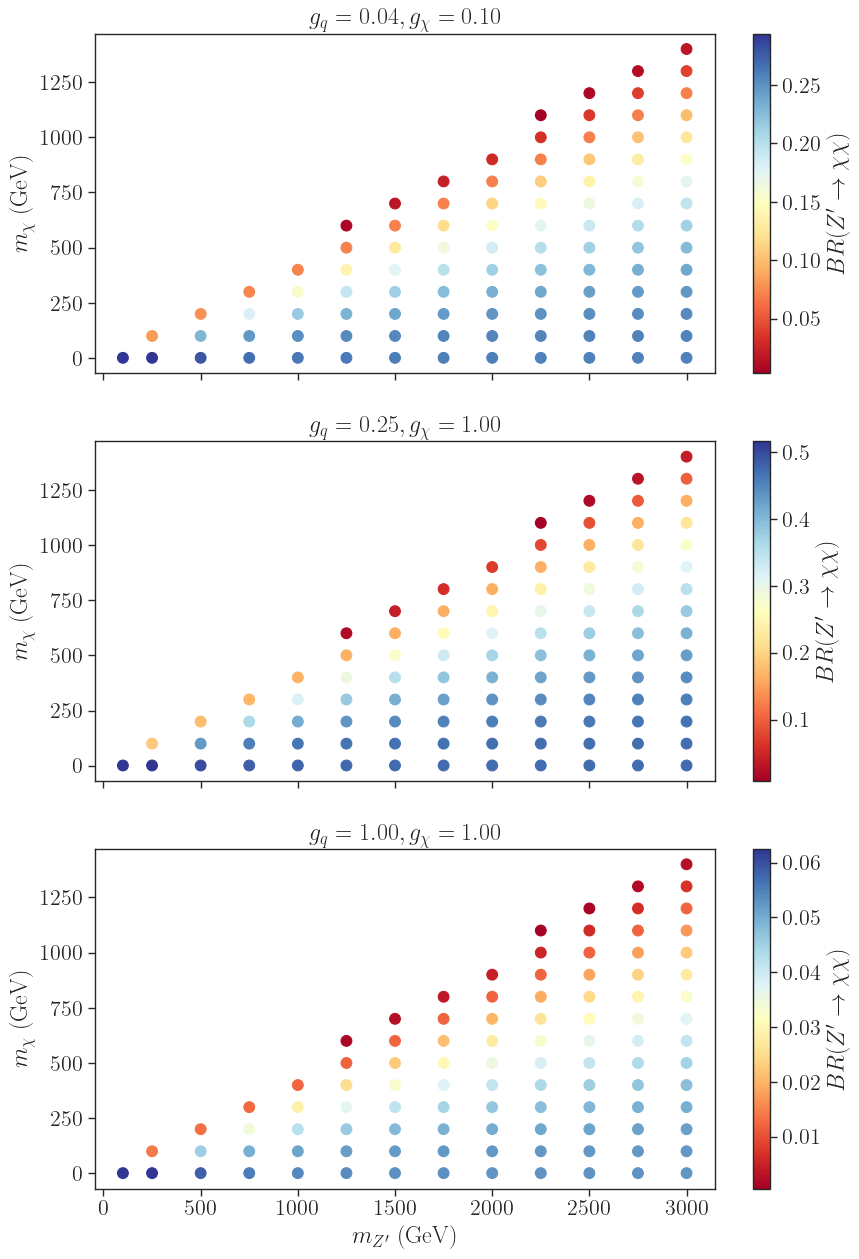

In [8]:
figs, ax = plt.subplots(3,sharex=True,figsize=(10,15))

for i, gs in enumerate(couplingPair):
    BR = np.array(dataDF_2mdm['BRs.zp.chi,chi'][(dataDF_2mdm['extpar.1']==gs[0]*1.414214)&(dataDF_2mdm['extpar.3']==gs[1])])

    
    x = dataDF_2mdm['mass.9900032'][(dataDF_2mdm['extpar.1']==gs[0]*1.414214)&(dataDF_2mdm['extpar.3']==gs[1])]
    y = dataDF_2mdm['mass.9000006'][(dataDF_2mdm['extpar.1']==gs[0]*1.414214)&(dataDF_2mdm['extpar.3']==gs[1])]
    z = BR
    
    sc = ax[i].scatter(x=x, y=y, c=z, s=60, cmap=cm)
    fig.colorbar(sc,ax=ax[i], label=r'$BR(Z^{\prime} \to \chi \chi)$')
    
    ax[i].set_ylabel(r'$m_{\chi}$ (GeV)')
    ax[i].set_title(r'$g_{q} = %1.2f, g_{\chi} = %1.2f$' %(gs[1], gs[0]))
#     ax[i].set_ylim(-50, 1450)
    
ax[2].set_xlabel(r'$m_{Z^{\prime}}$ (GeV)')
plt.show()

## Plot $r_{tot}/r_{(\sigma*BR)}$ from SModelS

In [9]:
pcl2MDM = ['../smodels_results_widths_2mdm/2mdm_results_widths.pcl']
pclDMsimp = ['../smodels_results_widths_dmsimp/dmsimp_results_widths.pcl']
dfs = [pd.read_pickle(i) for i in pcl2MDM]
newDF_2mdm = pd.concat(dfs, ignore_index=True)
dfs = [pd.read_pickle(i) for i in pclDMsimp]
newDF_dmsimp = pd.concat(dfs, ignore_index=True)

In [10]:
#Set points without results with r == 0
newDF_2mdm.fillna(value={c : 0 for c in newDF_2mdm.columns if c.endswith('.r')}, inplace=True)
newDF_dmsimp.fillna(value={c : 0 for c in newDF_dmsimp.columns if c.endswith('.r')}, inplace=True)

In [11]:
newDF_2mdm.sort_values(['mass.9000006', 'mass.9900032'], inplace=True)
newDF_dmsimp.sort_values(['mass.52', 'mass.55'], inplace=True)

/tmp/ipykernel_5114/187384469.py:10: RuntimeWarning: invalid value encountered in divide
  z = rtot/rsigmabr


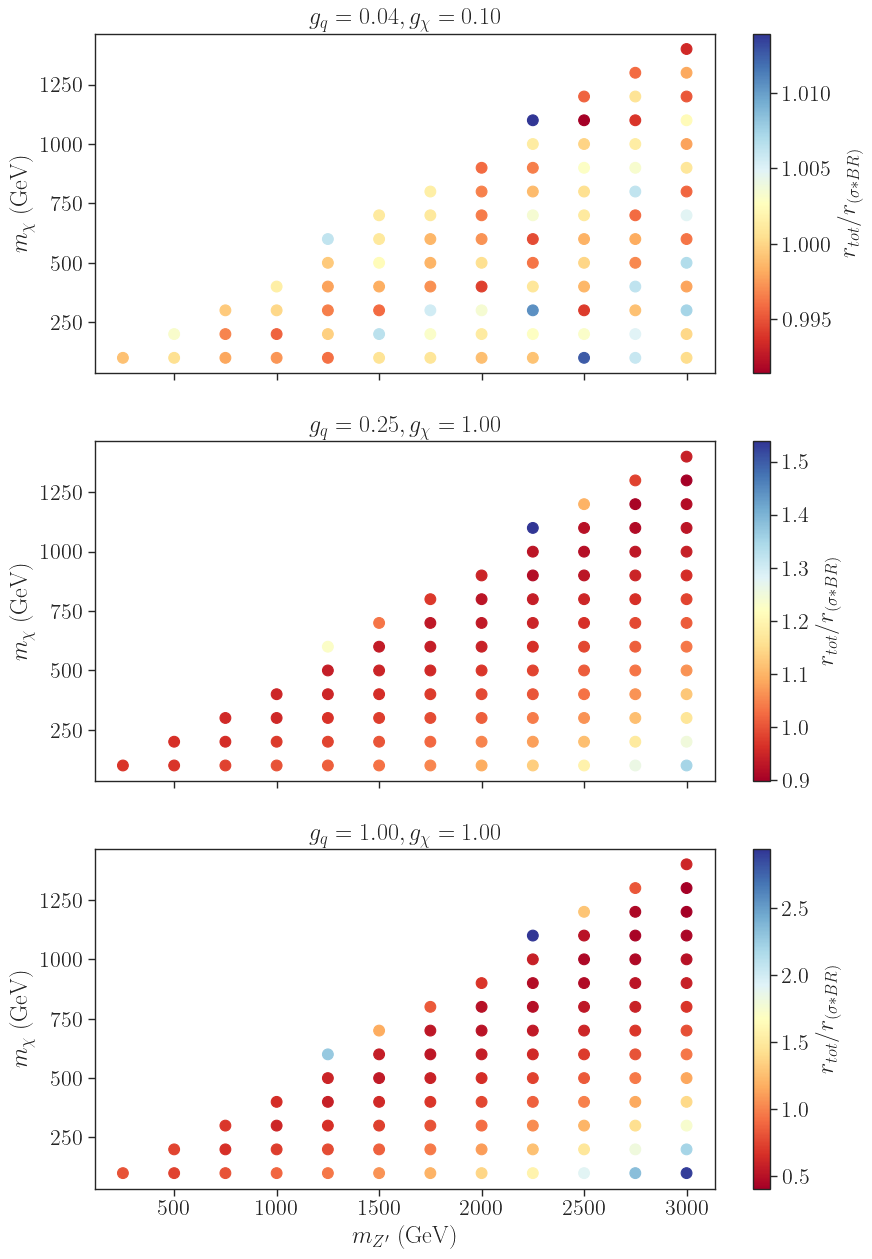

In [12]:
fig, ax = plt.subplots(3,sharex=True,figsize=(10,15))

for i, gs in enumerate(couplingPair):
    
    rtot = np.array(newDF_dmsimp['ExptRes.result0.r'][(newDF_dmsimp['extpar.3']==gs[0])&(newDF_dmsimp['extpar.10']==gs[1])])
    rsigmabr = np.array(newDF_2mdm['ExptRes.result0.r'][(newDF_2mdm['extpar.1']==gs[0]*1.414214)&(newDF_2mdm['extpar.3']==gs[1])])
    
    x = newDF_2mdm['mass.9900032'][(newDF_2mdm['extpar.1']==gs[0]*1.414214)&(newDF_2mdm['extpar.3']==gs[1])]
    y = newDF_2mdm['mass.9000006'][(newDF_2mdm['extpar.1']==gs[0]*1.414214)&(newDF_2mdm['extpar.3']==gs[1])]
    z = rtot/rsigmabr
    
    sc = ax[i].scatter(x=x, y=y, c=z, s=60, cmap=cm)
    fig.colorbar(sc,ax=ax[i], label=r'$r_{tot}/r_{(\sigma*BR)}$')
    
    ax[i].set_ylabel(r'$m_{\chi}$ (GeV)')
    ax[i].set_title(r'$g_{q} = %1.2f, g_{\chi} = %1.2f$' %(gs[1], gs[0]))
    
ax[2].set_xlabel(r'$m_{Z^{\prime}}$ (GeV)')
plt.savefig('../../figures/ratio-different-widths.png')
plt.show()